<a href="https://colab.research.google.com/github/darsh7807/learn-llm-with-me/blob/main/zero-to-hero/make_more_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words  = open('name.txt', 'r').read().splitlines()

FileNotFoundError: [Errno 2] No such file or directory: 'name.txt'

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

NameError: name 'words' is not defined

In [ ]:
block_size = 3

X,Y = [], []
for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

In [ ]:
C = torch.rand((27,2))

In [ ]:
C[5]

tensor([0.0135, 0.3042])

In [ ]:
emb =C[X]

In [ ]:
W1 = torch.randn(6,100)
b1 = torch.randn(100)

In [ ]:

torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1)

In [ ]:
h=emb.view(-1,6) @ W1 + b1

In [ ]:
h.shape

torch.Size([32, 100])

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @W2 + b2


In [ ]:
counts= logits.exp()
prob = counts / counts.sum(1, keepdims=True)


torch.Size([32, 27])

In [ ]:

torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
loss= -prob[torch.arange(32), Y].log().mean()


tensor(25.4474)

In [ ]:
def build_dataset(words):
  block_size=3
  X,Y = [], []
  for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = C = torch.rand((27,10), generator=g)
W1 = torch.rand((30,200), generator=g)
b1 = torch.rand(200, generator=g)
W2 = torch.rand((200,27), generator=g)
b2 = torch.rand(27, generator=g)

parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters)
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3,1, 1000)
lrs = 10**lre

In [ ]:
X = torch.tensor(Xtr)
Y = torch.tensor(Ytr)
stepi=[]
lossi=[]


/tmp/ipython-input-3110774658.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(Xtr)
/tmp/ipython-input-3110774658.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Ytr)


In [ ]:

for  i in range(200000):
  #batch
  ix = torch.randint(0, X.shape[0], (32,))

  #forwared pass
  emb=C[X[ix]]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix].long())


  #backward
  for p in parameters:
    p.grad = None
  loss.backward()
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -0.01* p.grad


  # print(loss.item())
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.5272374153137207


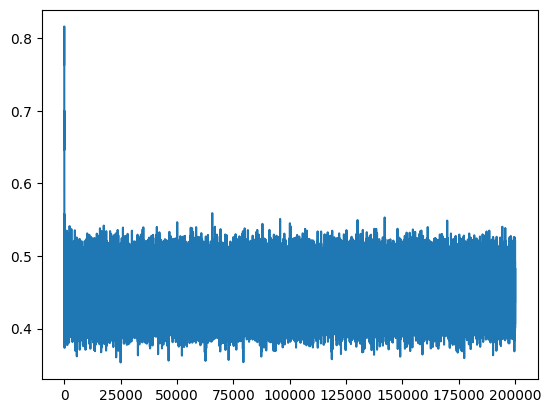

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb=C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss


tensor(2.1661, grad_fn=<NllLossBackward0>)

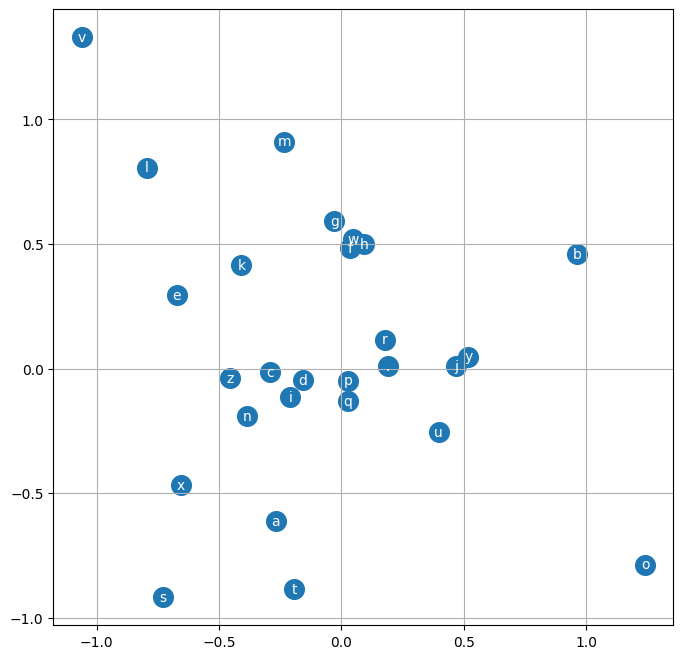

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for  i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [ ]:
g = torch.Generator().manual_seed(2147483647+10)

for _ in range(10):
  context = [0] * block_size
  out = []
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))


narmaheaae.
hlvihk.
mrs.
reaty.
hnaassnejr.
hnen.
amesahc.
.
aeei.
.
